The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
Note: All exercise data and structure are credited to Stanford University 

**Caveat:** Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 1 - Loading and Visualizing the Data

In [1]:
#Import numpy libraries to deal with matrixes and vectors
import numpy as np
#Import pandas do read data files
import pandas as pd
#Import matplotlib to plot data
import matplotlib.pyplot as plt

#Import math 
import math 

#Import scipy optimization function
from scipy import optimize, io
from scipy.ndimage import rotate

#Maximum precision in Numpy arrays
np.set_printoptions(suppress=True)

#Matplotlib notebook property
%matplotlib inline

In [2]:
#Define input layer Size and Number of labels (utcome space - 1 until 10 (10 mapped as 0))

input_layer_size = 400
num_labels = 10

In [3]:
#Use scipy Io to load matrix object
ex3_file = io.loadmat('ex3data1.mat')
X = np.array(ex3_file['X'])
y = np.array(ex3_file['y'])

print('# of training examples: {}'.format(len(X)))
m = len(X)

# of training examples: 5000


The data translates some portion of the MNIST dataset, translating vector representations of handrwritten digits. 
The data is unrolled into a 400 dimensional vector with grayscales intensity. By reshaping the data below we are going to be able to clearly see the digits themselves.

**We are going to plot 100 random digits**

In [4]:
#Select 100 random indices between 0 and 4999 
index = np.random.choice(X.shape[0], 101, replace=False) 

#Subset Array elements to Plot - using index
sel = X[index]

In [5]:
def displayData(images: np.array) -> None:
    '''
    Plot 10 by 10 grid of hand-written digit images
    '''
    fig=plt.figure(figsize=(10, 10))
    columns = 10
    rows = 10
    #Loop through each piece of the grid and plot the digit by reshaping the data into a 20 by 20 pixel image
    for i in range(1, sel.shape[0]):
        img = sel[i].reshape(20,20)
        fig.add_subplot(rows, columns, i)
        plt.imshow(rotate(img[::-1],270))
        plt.axis('off')
    plt.show()

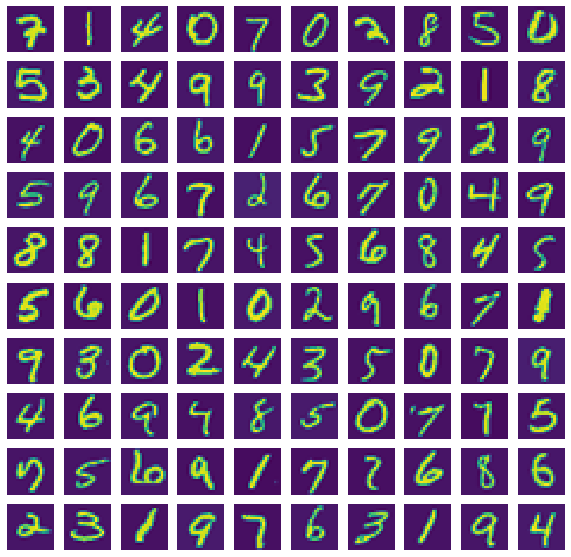

In [6]:
#Display the Grid

displayData(sel)

We want to develop a multi-class classification for Logistic Regression. Notice how the target is not binary 1 vs. 0 but a One vs. All approach. Each output will have the probability of a specific number beloging to a specific class (1-10)
Like Andrew, we will keep the 0 classed map for 10 although in Python this would not be a issue.

# Exercise 2 - Neural Networks

We are now going to fit a pre-trained Neural Network model. The neural network model has pre-train weights that are going to be applied according to the following schema: 

<img src="assets/NeuralNetwork.JPG">

Our input dimension has 401 nodes (400 columns from the X array + intercept); <br>
Our hidden layer consists of 25 nodes + intercept; <br>
Out output layer consists of 10 nodes (each one is a probability of the row belonging to each 0-9 digit); <br>

In [7]:
#Loading saved matrices with weights from file

weights = io.loadmat('ex3weights.mat')

#Define parameters for Neural Network model - Sizes of Layers

input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [8]:
#Assign theta 1 and theta 2

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [9]:
#Define sigmoid function 
def sigmoid(x: np.array)-> np.array:
    '''
    Outputs the Sigmoid for each element of an array
    '''
    return(1 / (1 + np.exp(-x)))

In [10]:
#Define predict function
def predict(Theta1: np.array, Theta2: np.array, X: np.array)-> np.array:
    '''
    Outputs the maximum class predicted by the Neural Network
    Returns array of predicted digits
    '''
    m = X.shape[0]

    #Add intercept
    ones_vector = np.ones((len(X),1))
    X_extended = np.hstack((ones_vector,X))
    
    staging_1 = sigmoid(np.dot(X_extended,Theta1.T))
    
    #Add ones to Staging_1 table
    ones_vector = np.ones((len(X),1))
    staging_1 = np.hstack((ones_vector,staging_1))
    
    staging_2 = sigmoid(np.dot(staging_1, Theta2.T))
    
    #We'll use idxmax to get the maximum probability assign to each row - add One to get the real digit
    prediction = pd.DataFrame(staging_2).idxmax(axis=1)+1
    
    return np.array(prediction)

In [11]:
pred = predict(Theta1,Theta2,X)

In [12]:
#Check accuracy of Neural Network

print("Accuracy is {:.2%} ".format(sum(np.array([1 if val == True else 0 for val in pred.reshape(len(y),1)==y]))/len(y)))

Accuracy is 97.52% 


Now, using the weights that have been pre-trained we can check what the Neural Network is predicting and plot the digit.

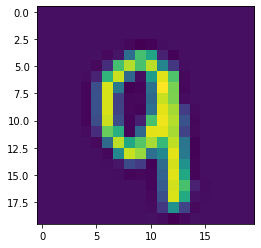

Digit is 9
Do you want to show another Digit? Press 0 to end.1


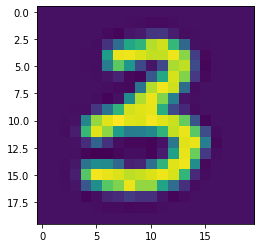

Digit is 3
Do you want to show another Digit? Press 0 to end.1


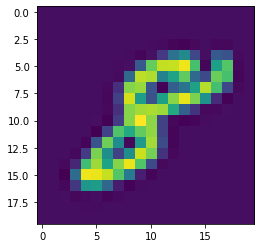

Digit is 8
Do you want to show another Digit? Press 0 to end.1


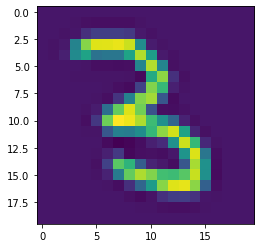

Digit is 3
Do you want to show another Digit? Press 0 to end.1


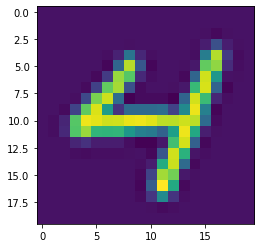

Digit is 4
Do you want to show another Digit? Press 0 to end.3


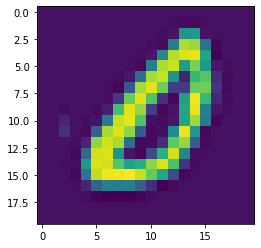

Digit is 10
Do you want to show another Digit? Press 0 to end.4


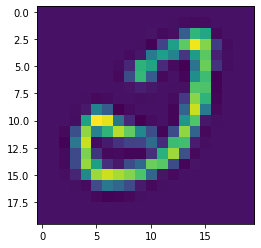

Digit is 2
Do you want to show another Digit? Press 0 to end.5


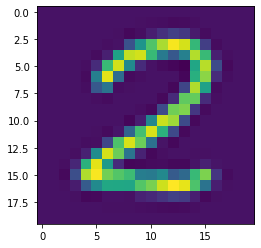

Digit is 2
Do you want to show another Digit? Press 0 to end.6


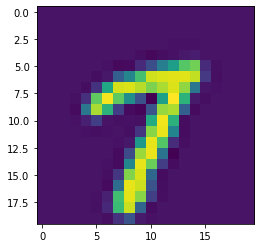

Digit is 7
Do you want to show another Digit? Press 0 to end.7


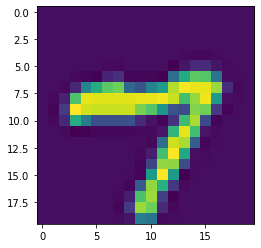

Digit is 7
Do you want to show another Digit? Press 0 to end.8


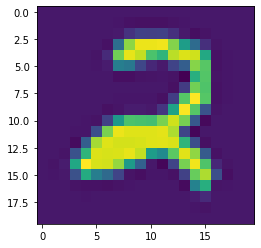

Digit is 2
Do you want to show another Digit? Press 0 to end.0


In [13]:
aux_break = 1

while aux_break:
    index = np.random.randint(0,len(X))
    img = X[index].reshape(20,20)
    plt.imshow(rotate(img[::-1],270))
    plt.show()
    print('Digit is {}'.format(int(y[index])))
    aux_break = input('Do you want to show another Digit? Press 0 to end.')   
    try: 
        aux_break = int(aux_break)
    except:
        pass